<a href="https://colab.research.google.com/github/Sachin44-ux/Project-4/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
5!pip install pandas numpy scikit-learn catboost xgboost lime shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 88.1 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7826140bba927479e353c546c68015edf1781b6a33f2a211d4ec268e04dfd0f2
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import shap
import lime.lime_tabular
import pickle
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/heart_disease (4).csv')

In [ ]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [ ]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [ ]:
df.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [ ]:
df.drop('Alcohol Consumption',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Stress Level          9978 non-null   object 
 13  Sleep Hours           9975 non-null   float64
 14  Sugar Consumption     9970 non-null   object 
 15  Triglyceride Level  

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_features=['Gender','Exercise Habits','Smoking','Family Heart Disease','Diabetes','High Blood Pressure','Low HDL Cholesterol','High LDL Cholesterol','Stress Level','Sugar Consumption','Heart Disease Status']

In [ ]:
# Apply Label Encoding on each categorical feature
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [ ]:
df.shape

(9532, 20)

Class Distribution:
Heart Disease Status
0    7621
1    1911
Name: count, dtype: int64


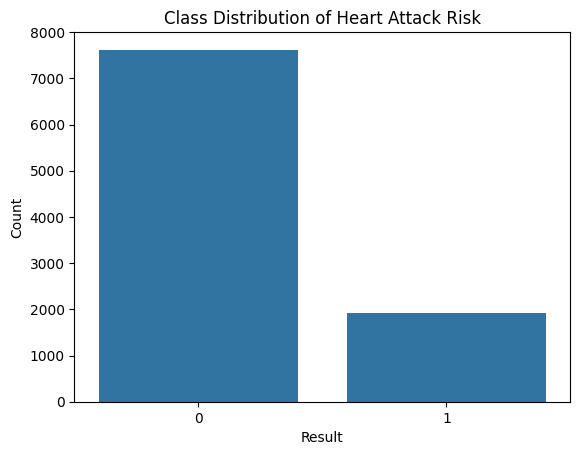

In [ ]:
# Check for class imbalance
class_counts = df['Heart Disease Status'].value_counts()
print("Class Distribution:")
print(class_counts)

# Plot the class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Heart Disease Status', data=df)
plt.title('Class Distribution of Heart Attack Risk')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df.shape

(9532, 20)

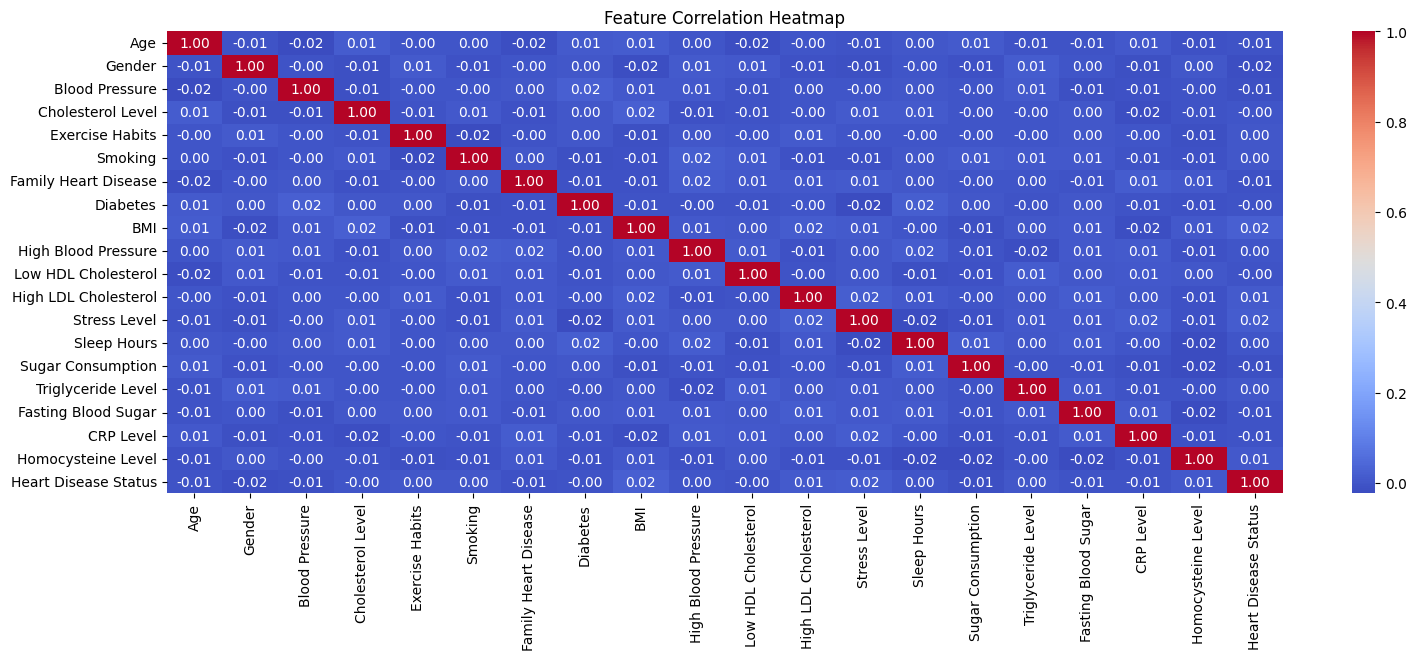

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the standardized data back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# Define base models
base_learners = [
('gbm', GradientBoostingClassifier()),
('cat'  ,CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)),
('xgb'  ,XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42))

]

In [ ]:
# Initialize BoostClassifier
gbm = GradientBoostingClassifier()

# Train the model
gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Predict on the test set
y_pred_test = gbm.predict(X_test)

# Evaluate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on the training set for training accuracy
y_pred_train = gbm.predict(X_train)

# Evaluate training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

Test Accuracy: 0.7981
Training Accuracy: 0.8025


In [ ]:
# Initialize CatBoostClassifier
cat = CatBoostClassifier(verbose=0)

# Train the model
cat.fit(X_train, y_train)

In [ ]:
# Predict on the test set
y_pred_test = cat.predict(X_test)

# Evaluate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on the training set for training accuracy
y_pred_train = cat.predict(X_train)

# Evaluate training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

Test Accuracy: 0.7997
Training Accuracy: 0.8323


In [ ]:
# Initialize XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict on the test set
y_pred_test = xgb.predict(X_test)

# Evaluate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on the training set for training accuracy
y_pred_train = xgb.predict(X_train)

# Evaluate training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

Test Accuracy: 0.7981
Training Accuracy: 0.8265


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
# Define meta-learner
meta_learner = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Create stacking classifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, passthrough=True)

In [ ]:
# Train the model
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('gbm', GradientBoostingClassifier()),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x7cfe5b675210>),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feat...
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=RandomForestClassifier(random_state=42),
                   passthrough=True)

In [ ]:
# Predictions
y_pred = stacking_model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, stacking_model.predict(X_train))
test_accuracy = accuracy_score(y_test, stacking_model.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8177
Testing Accuracy: 0.7997


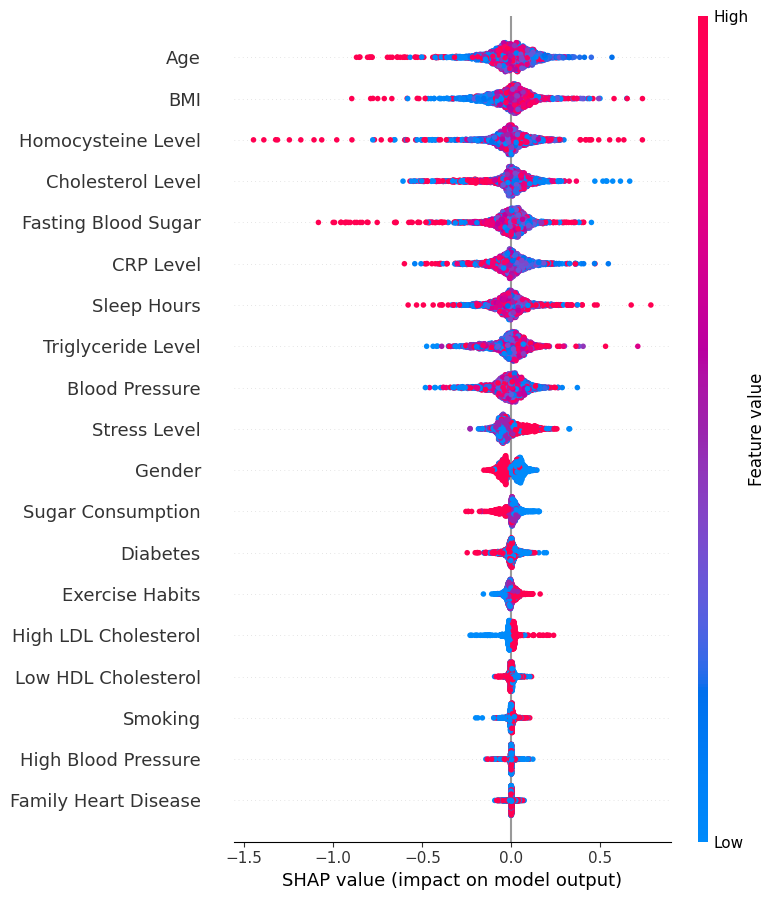

In [ ]:
import shap

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(xgb)  # gb is the trained GradientBoostingClassifier model
shap_values = explainer.shap_values(X_test)

# Summary plot for SHAP values
shap.summary_plot(shap_values, X_test)

In [ ]:
import lime
import lime.lime_tabular
import numpy as np

# Assuming X_train, X_test, and ensemble_model (your stacking model) are already defined and trained
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,                  # Training data for explainer
    mode='classification',                         # Classification mode
    feature_names=X_train.columns,                 # Feature names
    class_names=['No Disease', 'Disease'],         # Class labels (update as needed)
    discretize_continuous=True                     # For handling continuous features
)

# Randomly selecting a test instance to explain
idx = np.random.randint(0, X_test.shape[0])        # Select random index from test set

# Generate explanation for the selected test sample
exp = lime_explainer.explain_instance(
    data_row=X_test.values[idx],                   # Test instance to be explained
    predict_fn=stacking_model.predict_proba        # Function returning class probabilities
)

# Display explanation
exp.show_in_notebook()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
# Save the trained models
pickle.dump(xgb, open('xgboost_heart_model.sav', 'wb'))
pickle.dump(gbm, open('gradient_heart_boosting_model.sav', 'wb'))
pickle.dump(cat, open('catboost_heart_model.sav', 'wb'))
pickle.dump(stacking_model, open('stacking_heart_model.sav', 'wb'))

# Save the scaler for preprocessing during inference
pickle.dump(scaler, open('scaler_heart.sav', 'wb'))